In [2]:
# Se importa Bibliotecas

import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting, objective_functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt import black_litterman 
from pypfopt import BlackLittermanModel 
from sklearn import covariance

In [4]:
# tickers para cada país

tickers_usa = ["AAPL", "MSFT", "AMZN", "GOOG", "META", "NVDA","CRWD","SHOP","TSLA","SNOW"]  # Estados Unidos
tickers_china = ["0700.HK", "9988.HK", "9888.HK", "9618.HK", "9999.HK"] # china
tickers_spain = ["SAN.MC", "BBVA.MC", "TEF.MC", "REP.MC", "IBE.MC"]  # España
tickers_mexico = ["WALMEX.MX", "BIMBOA.MX", "CEMEXCPO.MX", "FEMSAUBD.MX", "GRUMAB.MX"]  # México
tickers_brazil = ["ABEV3.SA", "ITUB4.SA", "PETR4.SA", "BBDC4.SA", "VALE3.SA"]  # Brasil
tickers_colombia = ["ECOPETROL.CL", "GRUPOAVAL.CL", "CELSIA.CL", "ISA.CL", "NUTRESA.CL"]  # Colombia
tickers_chile = ["FALABELLA.SN", "CENCOSUD.SN", "COPEC.SN", "ENELAM.SN", "CHILE.SN"]  # Chile

In [5]:
# Se combina todos los tickers en una sola lista

In [6]:
all_tickers = tickers_usa + tickers_chile + tickers_spain + tickers_mexico + tickers_brazil + tickers_colombia + tickers_chile

In [7]:
# Se importa datos de precios (72 meses hasta el 1 de enero de 2024)

In [8]:
end_date = "2024-05-01"

In [9]:
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=72)

In [10]:
data = yf.download(all_tickers, start=start_date, end=end_date, interval='1mo')['Adj Close']

[*********************100%%**********************]  35 of 35 completed


In [11]:
# Se verifica si hay datos faltantes

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-05-01 to 2024-04-01
Freq: MS
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AAPL          72 non-null     float64
 1   ABEV3.SA      72 non-null     float64
 2   AMZN          72 non-null     float64
 3   BBDC4.SA      72 non-null     float64
 4   BBVA.MC       72 non-null     float64
 5   BIMBOA.MX     72 non-null     float64
 6   CELSIA.CL     72 non-null     float64
 7   CEMEXCPO.MX   72 non-null     float64
 8   CENCOSUD.SN   72 non-null     float64
 9   CHILE.SN      72 non-null     float64
 10  COPEC.SN      72 non-null     float64
 11  CRWD          58 non-null     float64
 12  ECOPETROL.CL  72 non-null     float64
 13  ENELAM.SN     72 non-null     float64
 14  FALABELLA.SN  72 non-null     float64
 15  FEMSAUBD.MX   72 non-null     float64
 16  GOOG          72 non-null     float64
 17  GRUMAB.MX     72 non-null     float64
 18  GRU

In [13]:
# Limpieza de datos: eliminar filas con valores faltantes

In [14]:
data_clean = data.dropna(axis=1)
data_clean

Ticker,AAPL,ABEV3.SA,AMZN,BBDC4.SA,BBVA.MC,BIMBOA.MX,CELSIA.CL,CEMEXCPO.MX,CENCOSUD.SN,CHILE.SN,...,NUTRESA.CL,NVDA,PETR4.SA,REP.MC,SAN.MC,SHOP,TEF.MC,TSLA,VALE3.SA,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,44.240307,15.702354,81.481003,13.751046,4.205687,34.504181,3444.582520,11.560550,1169.442383,67.029076,...,20620.046875,62.419544,6.450394,11.207244,3.601396,14.809000,4.848039,18.982000,32.131413,46.172585
2018-06-01,43.992641,14.338664,84.989998,12.688090,4.374952,35.366848,3474.535645,12.730253,1141.199707,68.897255,...,21283.449219,58.671383,5.853742,11.523422,3.595133,14.589000,4.675882,22.863333,31.471397,48.293976
2018-07-01,45.223698,15.612500,88.872002,14.409428,4.527650,36.253536,3362.212158,13.539296,1238.224854,69.445709,...,21596.998047,60.642788,6.715288,12.007944,3.773246,13.821000,5.072624,19.875999,34.803211,50.203228
2018-08-01,54.097794,15.162063,100.635498,13.499463,3.867877,36.335804,3420.476807,13.188385,1143.680176,68.648117,...,21381.320312,69.514069,6.558645,11.717916,3.403039,14.567000,4.608299,20.110666,34.028965,48.782810
2018-09-01,53.836781,14.751841,100.150002,13.645777,3.954311,36.482059,3333.546875,12.808233,1108.314697,70.082367,...,19490.546875,69.636345,7.199780,12.142349,3.440736,16.445999,4.496835,17.651333,39.057926,52.697033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,192.024185,13.047983,151.940002,16.476915,7.934484,84.748314,2837.073486,13.210000,1654.665649,96.072914,...,44718.191406,495.153229,34.717762,13.053245,3.705476,77.900002,3.402036,248.479996,73.894554,71.389999
2024-01-01,183.915543,13.080000,155.199997,15.251090,8.368536,77.246719,3177.330566,14.270000,1617.773071,96.778450,...,44725.042969,615.241150,37.999355,13.334690,3.662338,80.070000,3.770000,187.289993,64.858749,71.089996
2024-02-01,180.275131,12.580000,176.759995,13.676893,8.860462,70.386696,3677.252930,13.040000,1734.649536,103.973007,...,46555.781250,791.082886,37.421345,14.725000,3.770184,76.370003,3.793000,201.880005,64.121712,68.080002


In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-05-01 to 2024-04-01
Freq: MS
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AAPL          72 non-null     float64
 1   ABEV3.SA      72 non-null     float64
 2   AMZN          72 non-null     float64
 3   BBDC4.SA      72 non-null     float64
 4   BBVA.MC       72 non-null     float64
 5   BIMBOA.MX     72 non-null     float64
 6   CELSIA.CL     72 non-null     float64
 7   CEMEXCPO.MX   72 non-null     float64
 8   CENCOSUD.SN   72 non-null     float64
 9   CHILE.SN      72 non-null     float64
 10  COPEC.SN      72 non-null     float64
 11  ECOPETROL.CL  72 non-null     float64
 12  ENELAM.SN     72 non-null     float64
 13  FALABELLA.SN  72 non-null     float64
 14  FEMSAUBD.MX   72 non-null     float64
 15  GOOG          72 non-null     float64
 16  GRUMAB.MX     72 non-null     float64
 17  GRUPOAVAL.CL  72 non-null     float64
 18  IBE

In [16]:
# Se obtiene la lista de tickets que quedaron en data_clean
remaining_tickets = data_clean.columns.tolist()

# Se filtra la lista all_tickets para que solo contenga los tickets restantes
all_tickers_clean = [ticket for ticket in all_tickers if ticket in remaining_tickets]
print(all_tickers_clean)

['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'NVDA', 'SHOP', 'TSLA', 'FALABELLA.SN', 'CENCOSUD.SN', 'COPEC.SN', 'ENELAM.SN', 'CHILE.SN', 'SAN.MC', 'BBVA.MC', 'TEF.MC', 'REP.MC', 'IBE.MC', 'WALMEX.MX', 'BIMBOA.MX', 'CEMEXCPO.MX', 'FEMSAUBD.MX', 'GRUMAB.MX', 'ABEV3.SA', 'ITUB4.SA', 'PETR4.SA', 'BBDC4.SA', 'VALE3.SA', 'ECOPETROL.CL', 'GRUPOAVAL.CL', 'CELSIA.CL', 'ISA.CL', 'NUTRESA.CL', 'FALABELLA.SN', 'CENCOSUD.SN', 'COPEC.SN', 'ENELAM.SN', 'CHILE.SN']


In [18]:
# Mapeo de sufijos a tickers de tasas de cambio

In [19]:
currency_suffix_to_exchange_rate = {
    "MC": "EURUSD=X",
    "MX": "MXNUSD=X",
    "SA": "BRLUSD=X",
    "CL": "COPUSD=X",
    "SN": "CLPUSD=X",
    "HK": "HKDUSD=X"
}

In [20]:
# Se importaa datos de tasas de cambio

In [21]:
exchange_rates_data = yf.download(list(currency_suffix_to_exchange_rate.values()), 
                                  start='2018-05-01', end='2024-05-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [22]:
exchange_rates_data

Ticker,BRLUSD=X,CLPUSD=X,COPUSD=X,EURUSD=X,HKDUSD=X,MXNUSD=X
Date,,,,,,
2018-05-01,0.268666,0.001594,0.000348,1.166725,0.127443,0.050568
2018-06-01,0.259101,0.001541,0.000340,1.170494,0.127418,0.050686
2018-07-01,0.268233,0.001567,0.000348,1.170741,0.127422,0.053965
2018-08-01,0.241045,0.001473,0.000330,1.166466,0.127403,0.052356
2018-09-01,0.247036,0.001521,0.000335,1.162304,0.127748,0.053468
...,...,...,...,...,...,...
2023-12-01,0.206656,0.001147,0.000261,1.105583,0.128041,0.058975
2024-01-01,0.202008,0.001073,0.000255,1.084340,0.127926,0.058300
2024-02-01,0.201317,0.001022,0.000255,1.083882,0.127750,0.058523


In [23]:
# Se añade una columna de unos para USD
exchange_rates_data['USD'] = 1.0
exchange_rates_data

Ticker,BRLUSD=X,CLPUSD=X,COPUSD=X,EURUSD=X,HKDUSD=X,MXNUSD=X,USD
Date,,,,,,,
2018-05-01,0.268666,0.001594,0.000348,1.166725,0.127443,0.050568,1.0
2018-06-01,0.259101,0.001541,0.000340,1.170494,0.127418,0.050686,1.0
2018-07-01,0.268233,0.001567,0.000348,1.170741,0.127422,0.053965,1.0
2018-08-01,0.241045,0.001473,0.000330,1.166466,0.127403,0.052356,1.0
2018-09-01,0.247036,0.001521,0.000335,1.162304,0.127748,0.053468,1.0
...,...,...,...,...,...,...,...
2023-12-01,0.206656,0.001147,0.000261,1.105583,0.128041,0.058975,1.0
2024-01-01,0.202008,0.001073,0.000255,1.084340,0.127926,0.058300,1.0
2024-02-01,0.201317,0.001022,0.000255,1.083882,0.127750,0.058523,1.0


In [25]:
# Se crea una funcion para obtener la capitalizaciones de cada accion

for ticker in all_tickers_clean:
    suffix = ticker.split('.')[-1] if '.' in ticker else "USD"
    exchange_rate = exchange_rates_data[currency_suffix_to_exchange_rate.get(suffix, 'USD')]

    # Aplicar la conversión
    data_clean[ticker] = data_clean[ticker] * exchange_rate

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12760\3654136298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[ticker] = data_clean[ticker] * exchange_rate


In [26]:
data_clean

Ticker,AAPL,ABEV3.SA,AMZN,BBDC4.SA,BBVA.MC,BIMBOA.MX,CELSIA.CL,CEMEXCPO.MX,CENCOSUD.SN,CHILE.SN,...,NUTRESA.CL,NVDA,PETR4.SA,REP.MC,SAN.MC,SHOP,TEF.MC,TSLA,VALE3.SA,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,44.240307,4.218681,81.481003,3.694432,4.906880,1.744821,1.197283,0.584598,0.002973,0.000170,...,7.167204,62.419544,1.732998,13.075772,4.201839,14.809000,5.656329,18.982000,8.632603,2.334873
2018-06-01,43.992641,3.715161,84.989998,3.287496,5.120856,1.792605,1.180009,0.645246,0.002709,0.000164,...,7.228205,58.671383,1.516710,13.488099,4.208083,14.589000,5.473093,22.863333,8.154268,2.447830
2018-07-01,45.223698,4.187790,88.872002,3.865086,5.300705,1.956417,1.171502,0.730646,0.003041,0.000171,...,7.525086,60.642788,1.801263,14.058191,4.417493,13.821000,5.938728,19.875999,9.335375,2.709210
2018-08-01,54.097794,3.654742,100.635498,3.253980,4.511749,1.902414,1.130026,0.690497,0.002481,0.000149,...,7.063769,69.514069,1.580930,13.668555,3.969530,14.567000,5.375425,20.110666,8.202517,2.554095
2018-09-01,53.836781,3.644229,100.150002,3.370992,4.596112,1.950610,1.117515,0.684826,0.002565,0.000162,...,6.533874,69.636345,1.778602,14.113103,3.999182,16.445999,5.226690,17.651333,9.648697,2.817586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,192.024185,2.696450,151.940002,3.405061,8.772232,4.998073,0.739572,0.779066,0.002177,0.000126,...,11.657202,495.153229,7.174649,14.431448,4.096712,77.900002,3.761233,248.479996,15.270786,4.210260
2024-01-01,183.915543,2.642264,155.199997,3.080841,9.074338,4.503470,0.810697,0.831939,0.001862,0.000111,...,11.411604,615.241150,7.676172,14.459338,3.971220,80.070000,4.087962,187.289993,13.101983,4.144534
2024-02-01,180.275131,2.532563,176.759995,2.753386,9.603692,4.119241,0.937312,0.763140,0.001811,0.000109,...,11.866818,791.082886,7.533538,15.960157,4.086433,76.370003,4.111163,201.880005,12.908766,3.984246


In [27]:
# Se calculan los retornos esperados y la matriz de covarianza

In [28]:
mu = expected_returns.mean_historical_return(data_clean, frequency = 12)

In [54]:
print(mu)

Ticker
AAPL            0.255607
ABEV3.SA       -0.092574
AMZN            0.137914
BBDC4.SA       -0.049931
BBVA.MC         0.137515
BIMBOA.MX       0.157972
CELSIA.CL      -0.024278
CEMEXCPO.MX     0.053671
CENCOSUD.SN    -0.076587
CHILE.SN       -0.057357
COPEC.SN       -0.175776
ECOPETROL.CL   -0.051173
ENELAM.SN      -0.169802
FALABELLA.SN   -0.236935
FEMSAUBD.MX     0.078342
GOOG            0.206392
GRUMAB.MX       0.135146
GRUPOAVAL.CL   -0.147195
IBE.MC          0.146522
ISA.CL          0.028687
ITUB4.SA        0.004580
META            0.146500
MSFT            0.274900
NUTRESA.CL      0.043365
NVDA            0.559120
PETR4.SA        0.285421
REP.MC          0.032269
SAN.MC          0.022905
SHOP            0.300833
TEF.MC         -0.037662
TSLA            0.467035
VALE3.SA        0.062665
WALMEX.MX       0.083535
dtype: float64


In [30]:
S = risk_models.CovarianceShrinkage(data_clean, frequency = 12).ledoit_wolf()
S

Ticker,AAPL,ABEV3.SA,AMZN,BBDC4.SA,BBVA.MC,BIMBOA.MX,CELSIA.CL,CEMEXCPO.MX,CENCOSUD.SN,CHILE.SN,...,NUTRESA.CL,NVDA,PETR4.SA,REP.MC,SAN.MC,SHOP,TEF.MC,TSLA,VALE3.SA,WALMEX.MX
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.103679,0.033271,0.056079,0.025863,0.012905,0.020594,0.022734,0.041323,0.040576,0.017137,...,0.022666,0.081430,0.043509,0.003626,0.015613,0.077003,0.007874,0.118790,0.024441,0.020687
ABEV3.SA,0.033271,0.123296,0.025453,0.093338,0.067026,0.029904,0.035061,0.057962,0.077559,0.057774,...,0.039751,0.032104,0.093540,0.043678,0.059972,0.047929,0.039594,0.036980,0.064291,0.034383
AMZN,0.056079,0.025453,0.115605,0.013146,0.011642,0.016094,0.023413,0.051961,0.043792,0.025933,...,0.020254,0.091537,0.025657,-0.008043,0.007239,0.099539,0.003471,0.103927,0.010714,0.021698
BBDC4.SA,0.025863,0.093338,0.013146,0.192188,0.069977,0.027639,0.034763,0.049553,0.099451,0.085956,...,0.029190,-0.005572,0.151677,0.040057,0.067893,0.029943,0.048841,0.053895,0.072283,0.025093
BBVA.MC,0.012905,0.067026,0.011642,0.069977,0.178327,0.050259,0.040810,0.084880,0.081127,0.054943,...,0.032542,0.031246,0.070241,0.100451,0.129752,0.066259,0.063585,0.042017,0.073239,0.042375
BIMBOA.MX,0.020594,0.029904,0.016094,0.027639,0.050259,0.089584,0.014056,0.051093,0.049184,0.028717,...,0.015790,0.017917,0.020464,0.029571,0.039743,0.044264,0.015785,0.025554,0.028382,0.033213
CELSIA.CL,0.022734,0.035061,0.023413,0.034763,0.040810,0.014056,0.096897,0.040142,0.042674,0.037813,...,0.018214,0.047956,0.036694,0.036943,0.041395,0.034396,0.024351,0.043547,0.031602,0.019744
CEMEXCPO.MX,0.041323,0.057962,0.051961,0.049553,0.084880,0.051093,0.040142,0.177964,0.088704,0.050213,...,0.022230,0.077478,0.034380,0.038515,0.075091,0.116041,0.038599,0.057456,0.053524,0.051371
CENCOSUD.SN,0.040576,0.077559,0.043792,0.099451,0.081127,0.049184,0.042674,0.088704,0.231700,0.142281,...,0.038251,0.051184,0.087365,0.055346,0.075186,0.082972,0.043592,0.035612,0.085307,0.036600


In [31]:
# Instanciar la frontera eficiente

In [32]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe(risk_free_rate = 0.04357)
weights1 = ef.clean_weights()
rendimiento_esperado1, volatilidad1, razon_sharpe1 = ef.portfolio_performance(verbose=True)
weights1

c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 34.6%
Annual volatility: 28.7%
Sharpe Ratio: 1.06


c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


OrderedDict([('AAPL', 0.08096),
             ('ABEV3.SA', 0.0),
             ('AMZN', 0.00237),
             ('BBDC4.SA', 0.0),
             ('BBVA.MC', 0.0239),
             ('BIMBOA.MX', 0.05344),
             ('CELSIA.CL', 0.0),
             ('CEMEXCPO.MX', 0.0),
             ('CENCOSUD.SN', 0.0),
             ('CHILE.SN', 0.0),
             ('COPEC.SN', 0.0),
             ('ECOPETROL.CL', 0.0),
             ('ENELAM.SN', 0.0),
             ('FALABELLA.SN', 0.0),
             ('FEMSAUBD.MX', 0.0),
             ('GOOG', 0.06521),
             ('GRUMAB.MX', 0.03076),
             ('GRUPOAVAL.CL', 0.0),
             ('IBE.MC', 0.04922),
             ('ISA.CL', 0.0),
             ('ITUB4.SA', 0.0),
             ('META', 0.01253),
             ('MSFT', 0.11574),
             ('NUTRESA.CL', 0.0),
             ('NVDA', 0.24268),
             ('PETR4.SA', 0.10622),
             ('REP.MC', 0.0),
             ('SAN.MC', 0.0),
             ('SHOP', 0.07128),
             ('TEF.MC', 0.0),
     

In [33]:
ef = EfficientFrontier(mu, S)

# Encontrar el portafolio de mínima varianza
weights_min_vol = ef.min_volatility()
ret_min_vol, vol_min_vol, _ = ef.portfolio_performance()

In [34]:
# Determinar los pesos para el portafolio óptimo (maximizando el ratio de Sharpe)

In [35]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate = 0.04357)
weights = ef.clean_weights()
rendimiento_esperado, volatilidad, razon_sharpe = ef.portfolio_performance(verbose=True)
weights

Expected annual return: 33.6%
Annual volatility: 24.1%
Sharpe Ratio: 1.21


OrderedDict([('AAPL', 0.0),
             ('ABEV3.SA', 0.0),
             ('AMZN', 0.0),
             ('BBDC4.SA', 0.0),
             ('BBVA.MC', 0.0),
             ('BIMBOA.MX', 0.08228),
             ('CELSIA.CL', 0.0),
             ('CEMEXCPO.MX', 0.0),
             ('CENCOSUD.SN', 0.0),
             ('CHILE.SN', 0.0),
             ('COPEC.SN', 0.0),
             ('ECOPETROL.CL', 0.0),
             ('ENELAM.SN', 0.0),
             ('FALABELLA.SN', 0.0),
             ('FEMSAUBD.MX', 0.0),
             ('GOOG', 0.0),
             ('GRUMAB.MX', 0.0),
             ('GRUPOAVAL.CL', 0.0),
             ('IBE.MC', 0.10344),
             ('ISA.CL', 0.0),
             ('ITUB4.SA', 0.0),
             ('META', 0.0),
             ('MSFT', 0.38609),
             ('NUTRESA.CL', 0.0),
             ('NVDA', 0.28411),
             ('PETR4.SA', 0.13323),
             ('REP.MC', 0.0),
             ('SAN.MC', 0.0),
             ('SHOP', 0.0),
             ('TEF.MC', 0.0),
             ('TSLA', 0.01086),


c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12760\2764569129.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


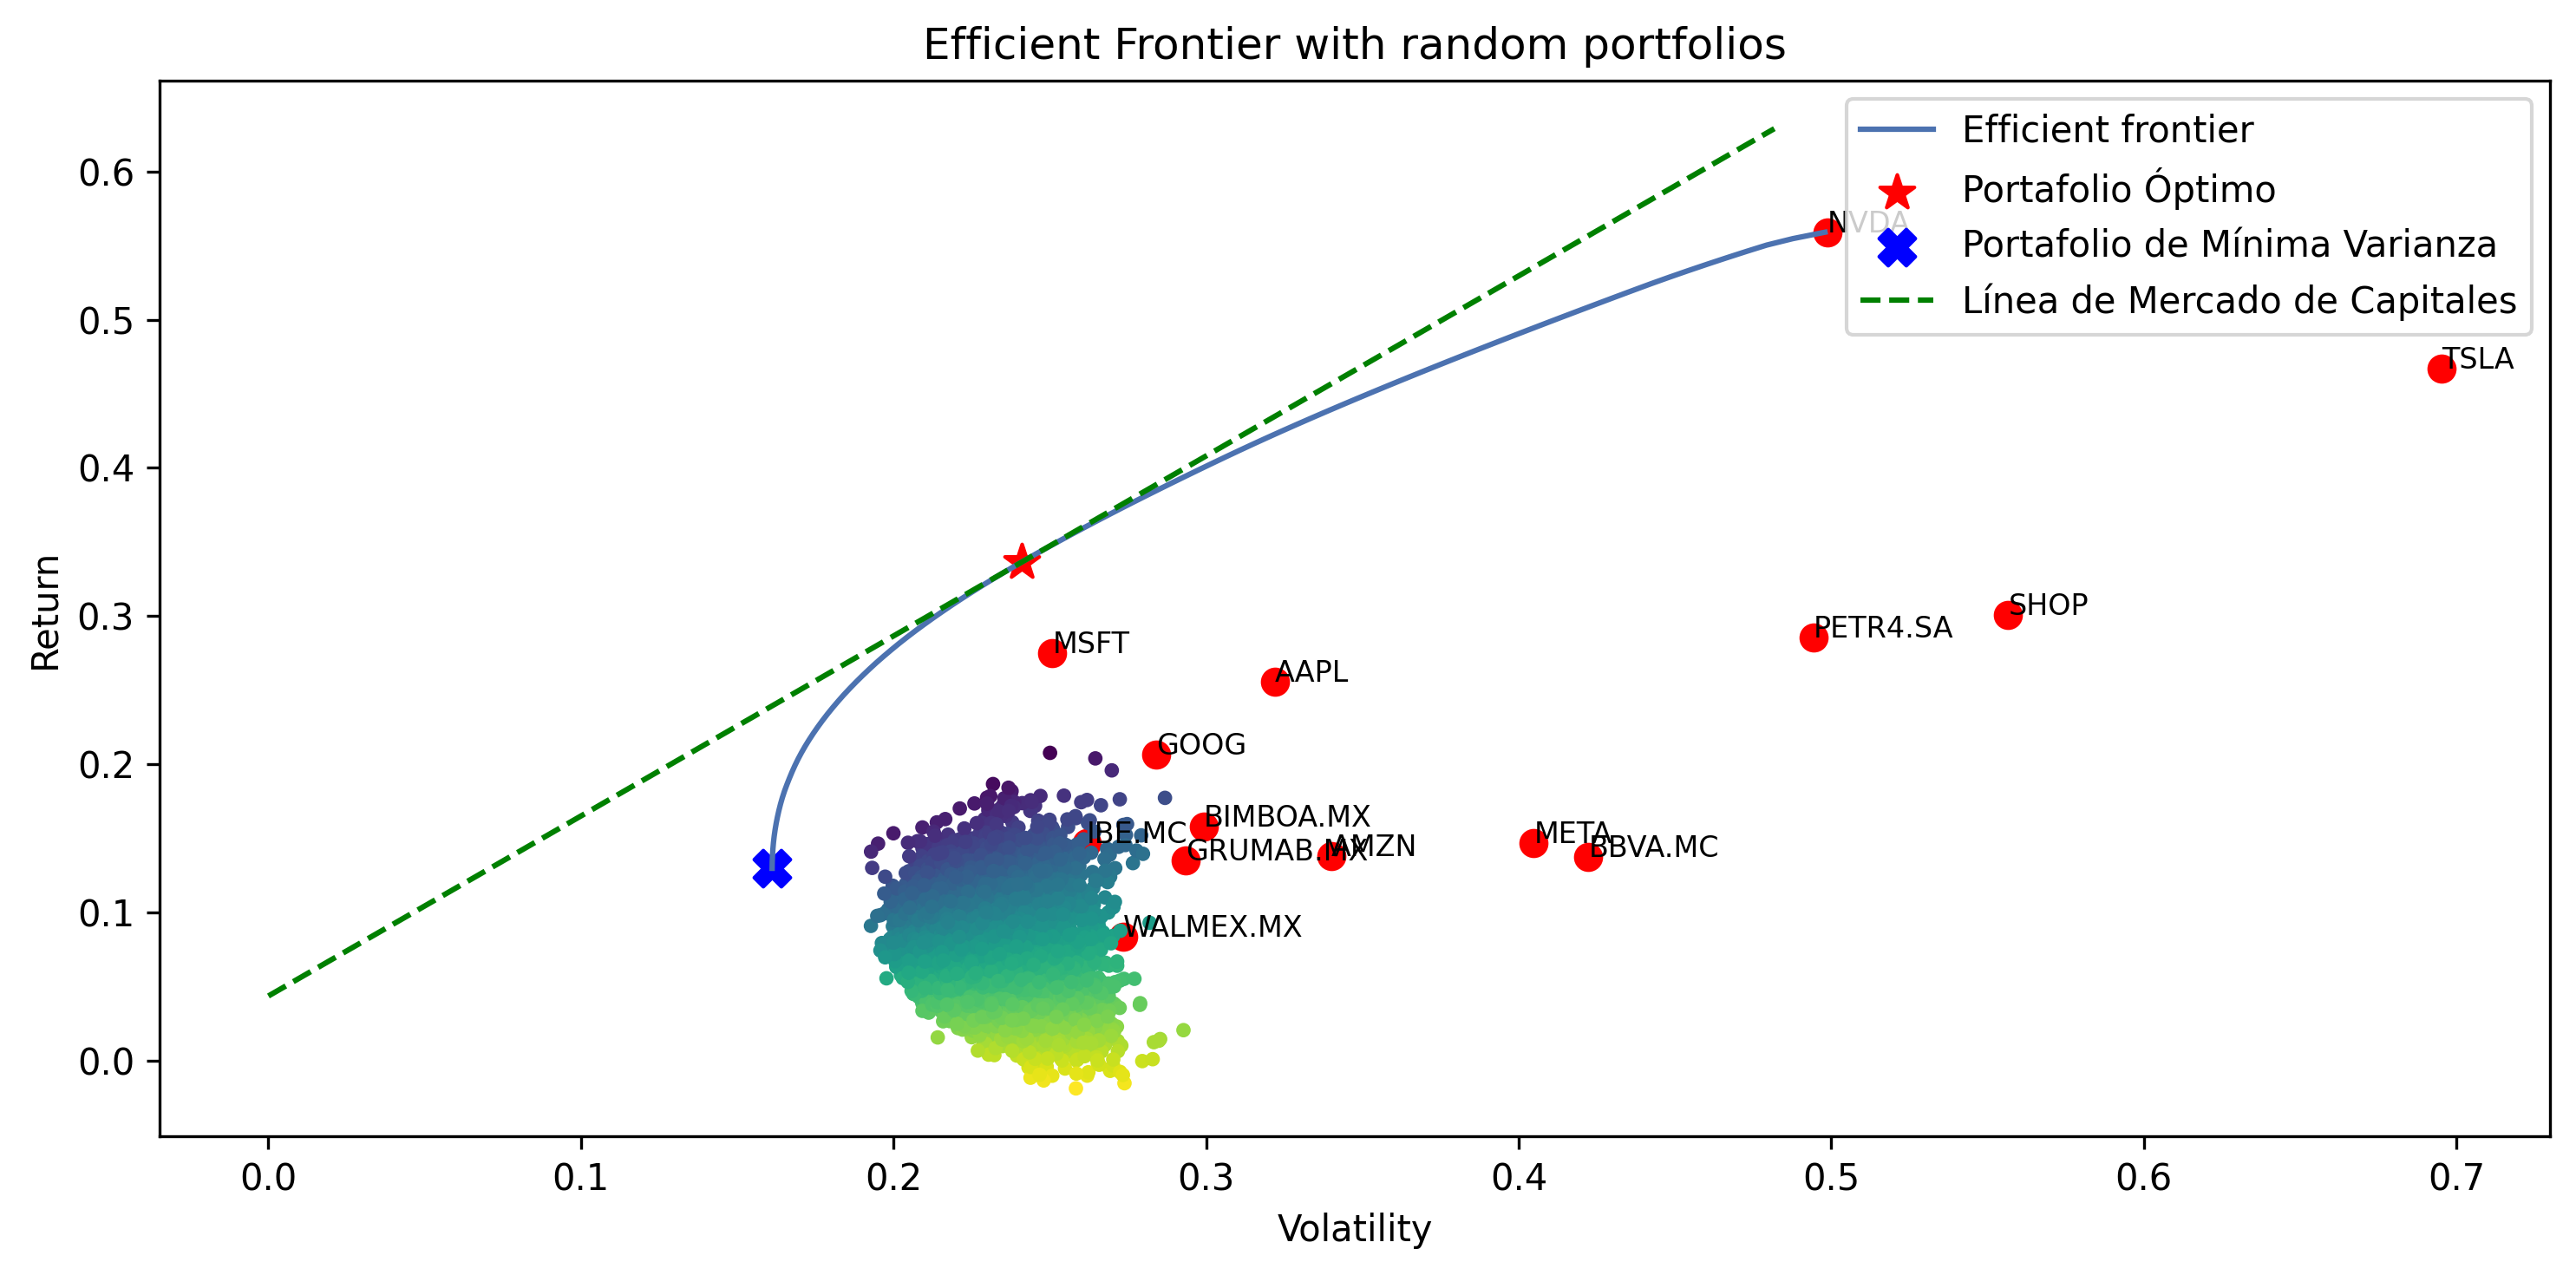

In [36]:
ef = EfficientFrontier(mu, S)

tasa_libre_riesgo = 0.04357

# Función para calcular la CML
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento_esperado - tasa_libre_riesgo) / (volatilidad - 0)  # Pendiente de la CML
    return lambda x: tasa_libre_riesgo + slope * x

# Graficar la frontera eficiente
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=False)

# Marcar el portafolio óptimo
ejes.scatter(volatilidad, rendimiento_esperado, marker='*', color='red', s=100, label='Portafolio Óptimo')

# Marcar el portafolio de mínima varianza
ejes.scatter(vol_min_vol, ret_min_vol, marker='X', color='blue', s=100, label='Portafolio de Mínima Varianza')

for activo, peso in weights1.items():
    # Calcula la volatilidad y el retorno esperado del activo
    if peso > 0:
        volatilidad_activo = S.loc[activo, activo] ** 0.5
        retorno_esperado_activo = mu[activo]

        # Marca el activo en el gráfico
        ejes.scatter(volatilidad_activo, retorno_esperado_activo, color='red', s=50)  # Marca el punto en la gráfica
        ejes.annotate(activo, 
                      (volatilidad_activo, retorno_esperado_activo), 
                      color='black', 
                      fontsize=8)  # Anota solo si el peso es mayor a 0

# Graficar la CML
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Ajuste en el rango de x para evitar el error
ejes.plot(x, cml(x), color="green", linestyle="--", label="Línea de Mercado de Capitales")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ejes.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ejes.set_title("Efficient Frontier with random portfolios")
ejes.legend()
plt.tight_layout()
plt.show()

In [40]:
# Crear una lista de tickers con peso positivo
activos_con_peso = [(ticker, peso) for ticker, peso in weights1.items() if peso > 0]


In [47]:
# Se depura los activos que no tengan peso y se observan en esta lista 

for ticker, peso in activos_con_peso:
    print(f"{ticker}: {peso:.4f}")

AAPL: 0.0810
AMZN: 0.0024
BBVA.MC: 0.0239
BIMBOA.MX: 0.0534
GOOG: 0.0652
GRUMAB.MX: 0.0308
IBE.MC: 0.0492
META: 0.0125
MSFT: 0.1157
NVDA: 0.2427
PETR4.SA: 0.1062
SHOP: 0.0713
TSLA: 0.1440
WALMEX.MX: 0.0017
